<a href="https://colab.research.google.com/github/romcanrom/DAP_rom/blob/main/Midterm_Lab_Class_2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Examination - Lab Session
### Data Analysis Programming - 4471017
##### Kangwon National University
##### 15. Oct. 2021.
---
| Problem | Score |
|---------|-------|
| 1       |(&emsp;&emsp;) / 50    |
| 2       |(&emsp;&emsp;) / 50    |
| Total   |(&emsp;&emsp;) / 100    |

---
* This examination contains **two problems**.

* You have **45 minutes** to complete the examination.

* You may use two (2) double-sided 8.5"\,$\times$\,11" pages with notes that you have prepared. You are allow to use internet. *However, communicating or sharing a code with other students are prohibited.* If so, **F** grade will be given according to the rules of Kangwon National University.
        
* You should make a directory named with your ID and name **(e.g., 202011111\_홍길동/)** and save all the files. If format is wrong, there will be degraded on overall score.

* You should copy the directory to **TA's USB**. Please confirm that all the files are successfully copied.

* No need to consider colors.
---

# Load Packages

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
# data Cars93
data = pd.read_csv('https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv',
                   header=2).set_index('customerid').sample(n=500, random_state=0)

# Extract job  & Education in newly from "jobedu" column.
data['job']= data["jobedu"].apply(lambda x: x.split(",")[0])
data['education']= data["jobedu"].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data.drop('jobedu', axis = 1, inplace = True)

# Column-wise filtration
selectedAttritbute = ['age',	'salary',	'balance',	'marital',	'targeted',	'job',	'education']
data = data[selectedAttritbute]

data.head()

,age,salary,balance,marital,targeted,job,education
customerid,,,,,,,
14002,37.0,100000,1403,married,yes,management,tertiary
32047,36.0,70000,-253,single,yes,services,secondary
13319,47.0,20000,-406,married,yes,blue-collar,primary
42992,57.0,16000,501,married,yes,housemaid,primary
14238,33.0,20000,-406,married,yes,blue-collar,secondary


# Problem 1. Statics and Data Visualization

## 1-1. Plot the kernel density estimate (KDE) plot of `salary` in condition of `education`. [15 pts]
- Use `kdeplot` of Seaborn

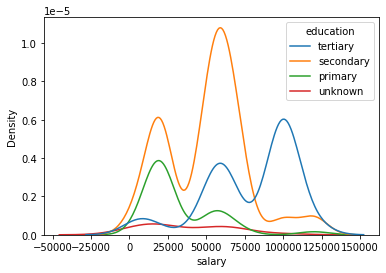

In [ ]:
sns.kdeplot(data=data['salary'], x=data['salary'], hue=data['education'])

# 1-2. Plot the pair plot for numerical variables. [35 points]
* [15 pts] 아래 완성된 그림을 참조하여 `marital` 상태에 따라 3개의 그룹을 나누어진 여섯 개의 `targeted`과 `salary`의 관계를 나타내고 있는 boxplot을 그리시오. (Referring to the completed figure below, draw a boxplot showing the relationship between six `targeted` and `salary`, divided into three groups according to `marital` status.) 
* [20 pts] `targeted`에 따른 `salary`의 차이가 존재하는 지 여부를 two-sample t-test를 통해 통계검정을 진행한 뒤 도출된 p-value를 각각의 axes에 출력시키시오. (After performing a statistical test through a two-sample t-test to see whether there is a difference in `salary` depending on the `targeted`, print the derived p-value on each axes.)

<function matplotlib.pyplot.show>

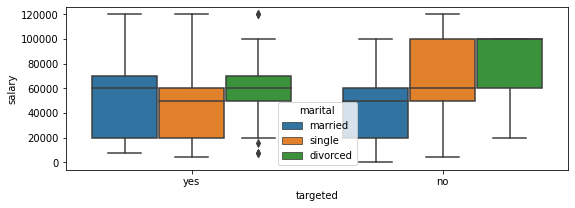

In [ ]:
from scipy.stats import ttest_ind

# Draw boxplots
fig, ax = plt.subplots(figsize=(9,3))

sns.boxplot(
    x=data.targeted, y=data.salary, hue=data.marital
)
plt.show

# Perform test and add text









# Problem 2. Data Preprocessing [50 Points]

## 2-1 Filtering and Encoding [20 Points]
* [5 Points] Remove samples with `unknown` `education`. 
* [5 Points] Encode `marital`, `targeted`, `job` attributes using one-hot encoding.
* [10 Points] Encode `education` attribute using ordinal encoding with order of (`primary`, `secondary`, `tertiary`).

In [ ]:
# Remove samples with `unknown` `education`. 

# Encode using one-hot encoding.
data_onehot = pd.get_dummies(data, columns = ['marital', 'targeted', 'job'])


# Encode using ordinal encoding
Edu_ord = {'primary' : 1,
       'secondary' : 2,
       'tertiary' : 3}
data['Edu'] = data.education.map(Edu_ord)

In [ ]:
data.head()

,age,salary,balance,marital,targeted,job,education,Edu
customerid,,,,,,,,
14002,37.0,100000,1403,married,yes,management,tertiary,3.0
32047,36.0,70000,-253,single,yes,services,secondary,2.0
13319,47.0,20000,-406,married,yes,blue-collar,primary,1.0
42992,57.0,16000,501,married,yes,housemaid,primary,1.0
14238,33.0,20000,-406,married,yes,blue-collar,secondary,2.0


# 2-2 Scaling [15 Points]
* [10 pts] Apply z-score scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler

# create a scaler object


# fit and transform the data


dataScale.head()

NameError: ignored

# 2-3 kNN imputation [15 Points]
* [15 pts] Apply kNN imputation with ten numbers of nearest neighbor.

In [ ]:
index = dataScale['age'].isna()
dataScale.loc[index, :]

In [ ]:
from sklearn.impute import KNNImputer

# create a imputer object


# fit and transform the data



In [ ]:
dataImp.loc[index, :]